[View in Colaboratory](https://colab.research.google.com/github/raahatg21/CIFAR-10-Dataset-with-Keras/blob/master/CIFAR_10_3.ipynb)

# CIFAR-10 Dataset: Object Classification

**Using ConvNets, Batch Normalization, Data Augmentation. 84.47% Validation Accuracy. 83.92% Testing Accuracy.**

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras import models
from keras import layers
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
# Preprocessing the data

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [0]:
X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.astype('float32')
X_test /= 255

In [6]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [7]:
# Preprocessing the Labels

y_train.shape, y_test.shape

((50000, 1), (10000, 1))

In [0]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [9]:
y_train.shape, y_test.shape

((50000, 10), (10000, 10))

In [0]:
# Spiltting training and validation sets

X_val = X_train[:10000]
y_val = y_train[:10000]

X_train = X_train[10000:]
y_train = y_train[10000:]

In [11]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((40000, 32, 32, 3), (40000, 10), (10000, 32, 32, 3), (10000, 10))

In [0]:
# Data Augmentation

datagen = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1, height_shift_range = 0.1, shear_range = 0.1, zoom_range = 0.1, horizontal_flip = True, fill_mode = 'nearest')
datagen.fit(X_train)

In [0]:
# Building the model

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
__________

In [0]:
# Compiling the Model

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
# Creating the Callback

callback = [ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor = 0.1, min_lr = 0.001)]

In [17]:
# Training

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 20), steps_per_epoch = 2000, epochs = 16, validation_data = (X_val, y_val), validation_steps = 500, callbacks = callback)

Epoch 1/16
2000/2000 [==============================] - 76s 38ms/step - loss: 1.7338 - acc: 0.4041 - val_loss: 1.1543 - val_acc: 0.5851
Epoch 2/16
2000/2000 [==============================] - 74s 37ms/step - loss: 1.1863 - acc: 0.5842 - val_loss: 0.9750 - val_acc: 0.6696
Epoch 3/16
2000/2000 [==============================] - 73s 37ms/step - loss: 1.0230 - acc: 0.6449 - val_loss: 0.7797 - val_acc: 0.7254
Epoch 4/16
2000/2000 [==============================] - 73s 37ms/step - loss: 0.9294 - acc: 0.6796 - val_loss: 0.8361 - val_acc: 0.7155
Epoch 5/16
2000/2000 [==============================] - 73s 37ms/step - loss: 0.8747 - acc: 0.7009 - val_loss: 0.7490 - val_acc: 0.7458
Epoch 6/16
2000/2000 [==============================] - 73s 36ms/step - loss: 0.8183 - acc: 0.7212 - val_loss: 0.7497 - val_acc: 0.7423
Epoch 7/16
2000/2000 [==============================] - 73s 36ms/step - loss: 0.7798 - acc: 0.7361 - val_loss: 0.6987 - val_acc: 0.7624
Epoch 8/16
2000/2000 [==========================

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

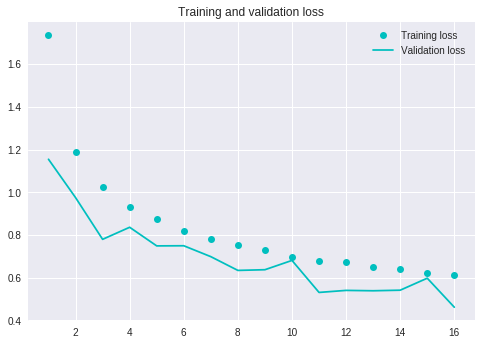

In [19]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'co', label='Training loss')
plt.plot(epochs, val_loss, 'c', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

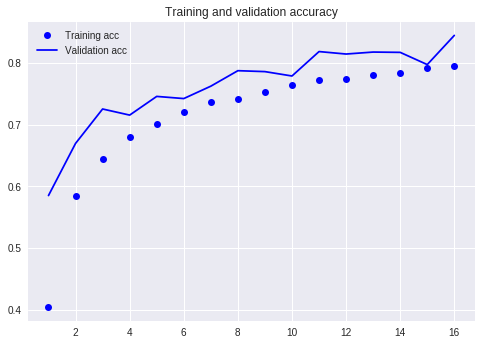

In [20]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [21]:
# Testing

test_loss, test_acc = model.evaluate(X_test, y_test)
test_loss, test_acc

10000/10000 [==============================] - 4s 369us/step


(0.47667439670562745, 0.8392)